<a href="https://colab.research.google.com/github/sznajder/Lectures/blob/master/MLP_VBFHZZ_TFKeras_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple analysis for pp->WW polarization study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import gc
import os
import sys
import h5py

data_dir = '/home/dbfranzosi/Documents/talks/202108_Polarization_School/Material/data'

In [2]:
def get_df(file_name):

    with h5py.File(file_name, 'r') as file:
        #print(file.keys())
        
        weights = np.array(file['weights'])
        
        detector_info = np.array(file['detector_info'])
        truth_info = np.array(file['truth_info'])

        detector_info_names = np.array(file['detector_info_names'])
        truth_info_names = np.array(file['truth_info_names'])
    
    weights = pd.DataFrame(weights, columns=['xs_weight'])    
    detector = pd.DataFrame(detector_info, columns=[elem.decode('UTF-8') for elem in detector_info_names])
    truth = pd.DataFrame(truth_info, columns=[elem.decode('UTF-8') for elem in truth_info_names])

    # Concatenate dataframes
    df = pd.concat([ detector, truth, weights], axis=1)

    return df


In [3]:
files = ['PROC_bsm_pp-ww0', 'PROC_bsm_pp-wwT','PROC_sm_pp-ww0', 
         'PROC_sm_pp-wwT', 'PROC_bsm_pp-ww','PROC_sm_pp-ww']


df = {}
for file in files:
    df[file] = get_df(data_dir+'/'+file+'.h5')


In [4]:
print(list(df[files[0]].columns.values))

['mwlep_det', 'mwhad_det', 'cosl_Wref_det', 'phil_Wref_det', 'mww_det', 'mwlep_truth', 'mwhad_truth', 'cosl_Wref_truth', 'phil_Wref_truth', 'mww_truth', 'xs_weight']


In [5]:
import matplotlib.pyplot as plt
    
def plotdf(df, feat, bins, scale=1.0, label='hist', norm='entries'):
    unitnorm = False
    if norm == 'entries':
        weights = scale*df['xs_weight']/df['xs_weight'].shape[0]
    elif norm == 'unit':
        weights = df['xs_weight']/df['xs_weight'].sum()
        unitnorm = True
    else:
        weights = scale*df['xs_weight']
    df[feat].plot.hist(bins=bins, label=label,
            histtype='step', density=unitnorm, weights=weights)
    

In [6]:
lum = 1e5 # 100/fb

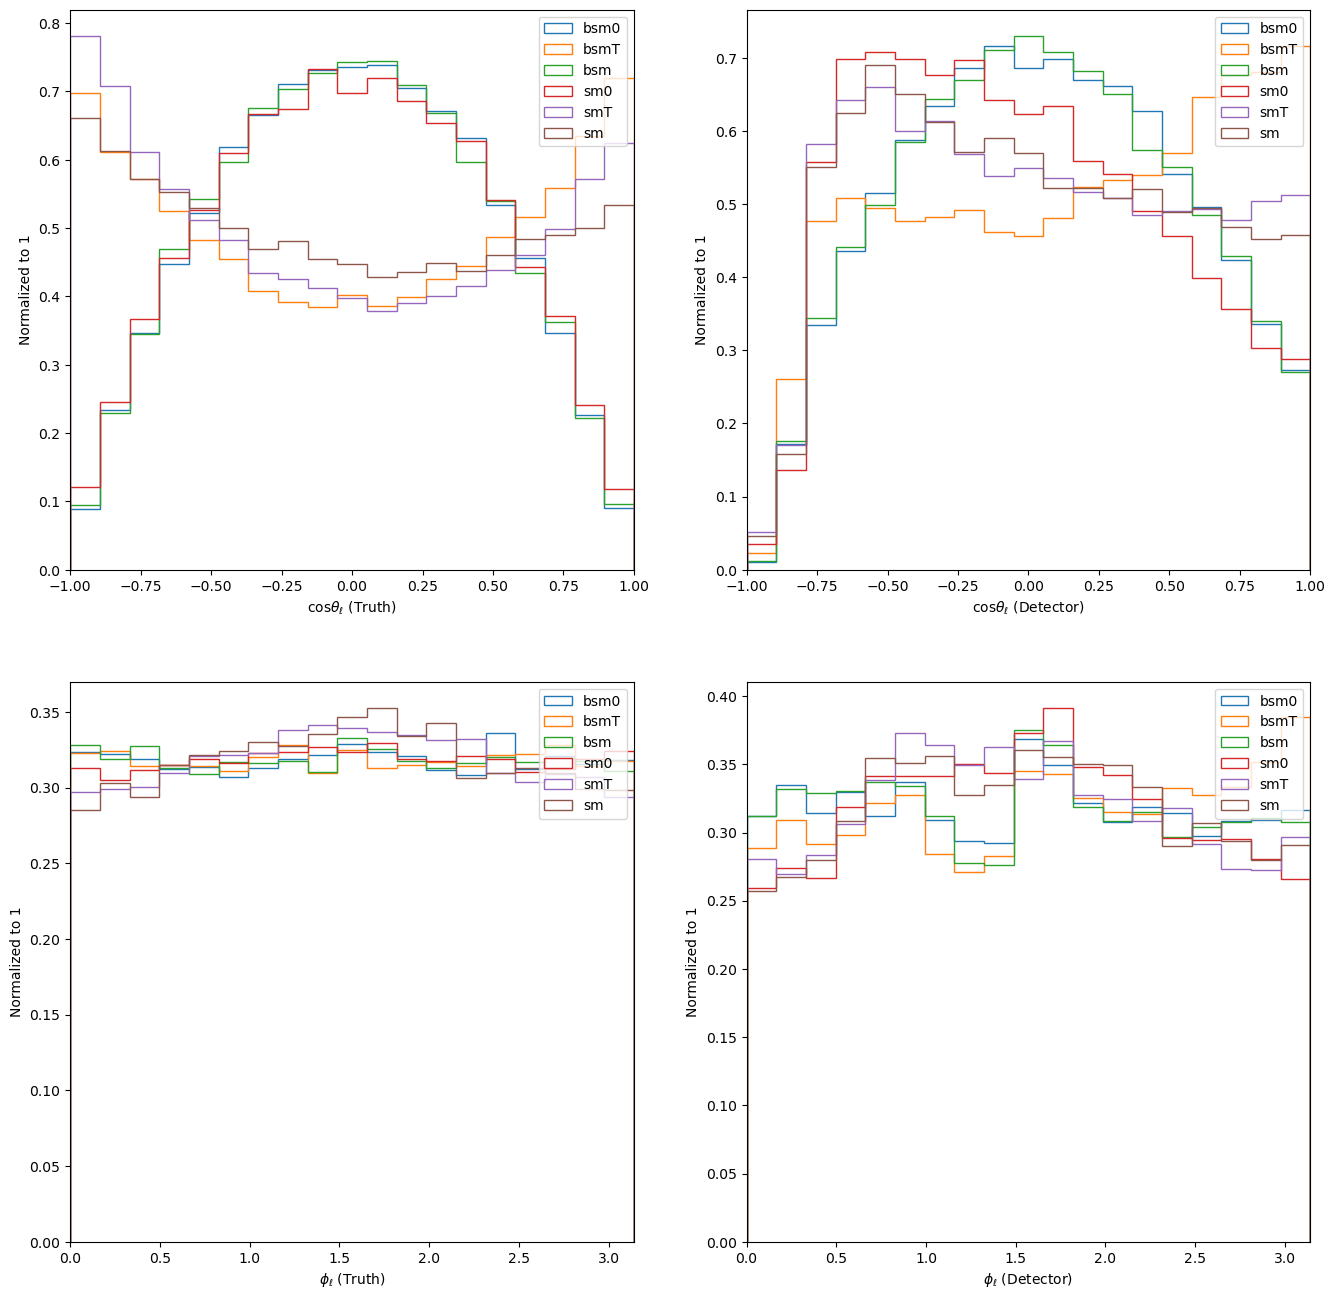

In [7]:

plt.style.use('default') 
plt.figure(figsize=(16, 16),dpi=100)

plt.subplot(2, 2, 1)
plt.xlabel('$\cos\\theta_\ell$ (Truth)')
#plt.yscale('log')
X = np.linspace(-1.0,1.0,20)
plotdf(df['PROC_bsm_pp-ww0'],'cosl_Wref_truth',X, scale=lum, label='bsm0', norm='unit')
plotdf(df['PROC_bsm_pp-wwT'],'cosl_Wref_truth',X, scale=lum, label='bsmT', norm='unit')
plotdf(df['PROC_bsm_pp-ww'],'cosl_Wref_truth',X, scale=lum, label='bsm', norm='unit')

plotdf(df['PROC_sm_pp-ww0'],'cosl_Wref_truth',X, scale=lum, label='sm0', norm='unit')
plotdf(df['PROC_sm_pp-wwT'],'cosl_Wref_truth',X, scale=lum, label='smT', norm='unit')
plotdf(df['PROC_sm_pp-ww'],'cosl_Wref_truth',X, scale=lum, label='sm', norm='unit')

#plt.ylabel('Events@100/fb')
plt.ylabel('Normalized to 1')
plt.legend(loc='upper right')
plt.xlim(-1.0,1.0)

plt.subplot(2, 2, 2)
plt.xlabel('$\cos\\theta_\ell$ (Detector)')
#plt.yscale('log')
X = np.linspace(-1.0,1.0,20)
plotdf(df['PROC_bsm_pp-ww0'],'cosl_Wref_det',X, scale=lum, label='bsm0', norm='unit')
plotdf(df['PROC_bsm_pp-wwT'],'cosl_Wref_det',X, scale=lum, label='bsmT', norm='unit')
plotdf(df['PROC_bsm_pp-ww'],'cosl_Wref_det',X, scale=lum, label='bsm', norm='unit')

plotdf(df['PROC_sm_pp-ww0'],'cosl_Wref_det',X, scale=lum, label='sm0', norm='unit')
plotdf(df['PROC_sm_pp-wwT'],'cosl_Wref_det',X, scale=lum, label='smT', norm='unit')
plotdf(df['PROC_sm_pp-ww'],'cosl_Wref_det',X, scale=lum, label='sm', norm='unit')

#plt.ylabel('Events@100/fb')
plt.ylabel('Normalized to 1')
plt.legend(loc='upper right')
plt.xlim(-1.0,1.0)

plt.subplot(2, 2, 3)
plt.xlabel('$\phi_\ell$ (Truth)')
#plt.yscale('log')
X = np.linspace(0,np.pi,20)
plotdf(df['PROC_bsm_pp-ww0'],'phil_Wref_truth',X, scale=lum, label='bsm0', norm='unit')
plotdf(df['PROC_bsm_pp-wwT'],'phil_Wref_truth',X, scale=lum, label='bsmT', norm='unit')
plotdf(df['PROC_bsm_pp-ww'],'phil_Wref_truth',X, scale=lum, label='bsm', norm='unit')

plotdf(df['PROC_sm_pp-ww0'],'phil_Wref_truth',X, scale=lum, label='sm0', norm='unit')
plotdf(df['PROC_sm_pp-wwT'],'phil_Wref_truth',X, scale=lum, label='smT', norm='unit')
plotdf(df['PROC_sm_pp-ww'],'phil_Wref_truth',X, scale=lum, label='sm', norm='unit')

#plt.ylabel('Events@100/fb')
plt.ylabel('Normalized to 1')
plt.legend(loc='upper right')
plt.xlim(0.,np.pi)

plt.subplot(2, 2, 4)
plt.xlabel('$\phi_\ell$ (Detector)')
#plt.yscale('log')
X = np.linspace(0,np.pi,20)
plotdf(df['PROC_bsm_pp-ww0'],'phil_Wref_det',X, label='bsm0', norm='unit')
plotdf(df['PROC_bsm_pp-wwT'],'phil_Wref_det',X, label='bsmT', norm='unit')
plotdf(df['PROC_bsm_pp-ww'],'phil_Wref_det',X, label='bsm', norm='unit')

plotdf(df['PROC_sm_pp-ww0'],'phil_Wref_det',X, label='sm0', norm='unit')
plotdf(df['PROC_sm_pp-wwT'],'phil_Wref_det',X, label='smT', norm='unit')
plotdf(df['PROC_sm_pp-ww'],'phil_Wref_det',X, label='sm', norm='unit')

#plt.ylabel('Events@100/fb')
plt.ylabel('Normalized to 1')
plt.legend(loc='upper right')
plt.xlim(0,np.pi)

plt.savefig('angular_variables.pdf')


(0.0, 1000.0)

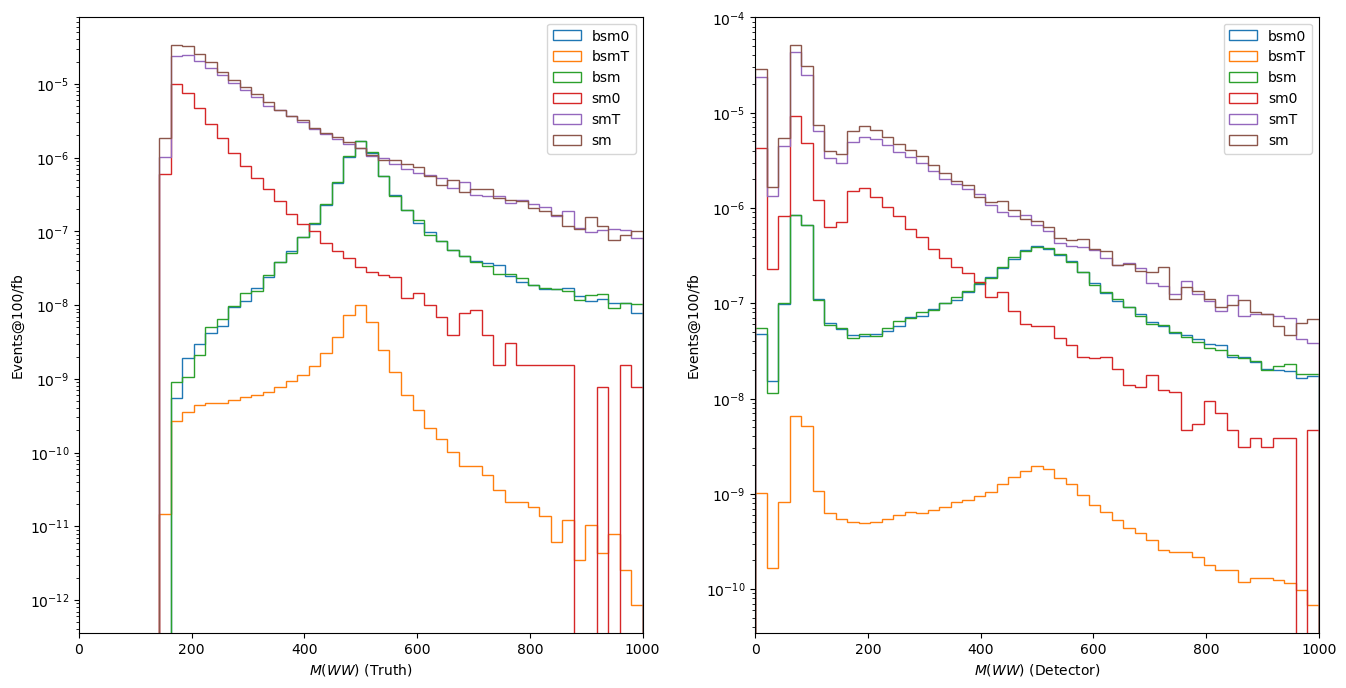

In [8]:
plt.style.use('default') 
plt.figure(figsize=(16, 8),dpi=100)

plt.subplot(1, 2, 1)
plt.xlabel('$M(WW)$ (Truth)')
plt.yscale('log')
X = np.linspace(0.0,1000.0,50)
plotdf(df['PROC_bsm_pp-ww0'],'mww_truth',X, label='bsm0')
plotdf(df['PROC_bsm_pp-wwT'],'mww_truth',X, label='bsmT')
plotdf(df['PROC_bsm_pp-ww'],'mww_truth',X, label='bsm')

plotdf(df['PROC_sm_pp-ww0'],'mww_truth',X, label='sm0')
plotdf(df['PROC_sm_pp-wwT'],'mww_truth',X, label='smT')
plotdf(df['PROC_sm_pp-ww'],'mww_truth',X, label='sm')

plt.ylabel('Events@100/fb')
plt.legend(loc='upper right')
plt.xlim(0.0,1000.0)

plt.subplot(1, 2, 2)
plt.xlabel('$M(WW)$ (Detector)')
X = np.linspace(0.0,1000.0,50)
plt.yscale('log')
plotdf(df['PROC_bsm_pp-ww0'],'mww_det',X, label='bsm0')
plotdf(df['PROC_bsm_pp-wwT'],'mww_det',X, label='bsmT')
plotdf(df['PROC_bsm_pp-ww'],'mww_det',X, label='bsm')

plotdf(df['PROC_sm_pp-ww0'],'mww_det',X, label='sm0')
plotdf(df['PROC_sm_pp-wwT'],'mww_det',X, label='smT')
plotdf(df['PROC_sm_pp-ww'],'mww_det',X, label='sm')
plt.ylabel('Events@100/fb')
plt.legend(loc='upper right')
plt.xlim(0.0,1000.0)


(0.0, 200.0)

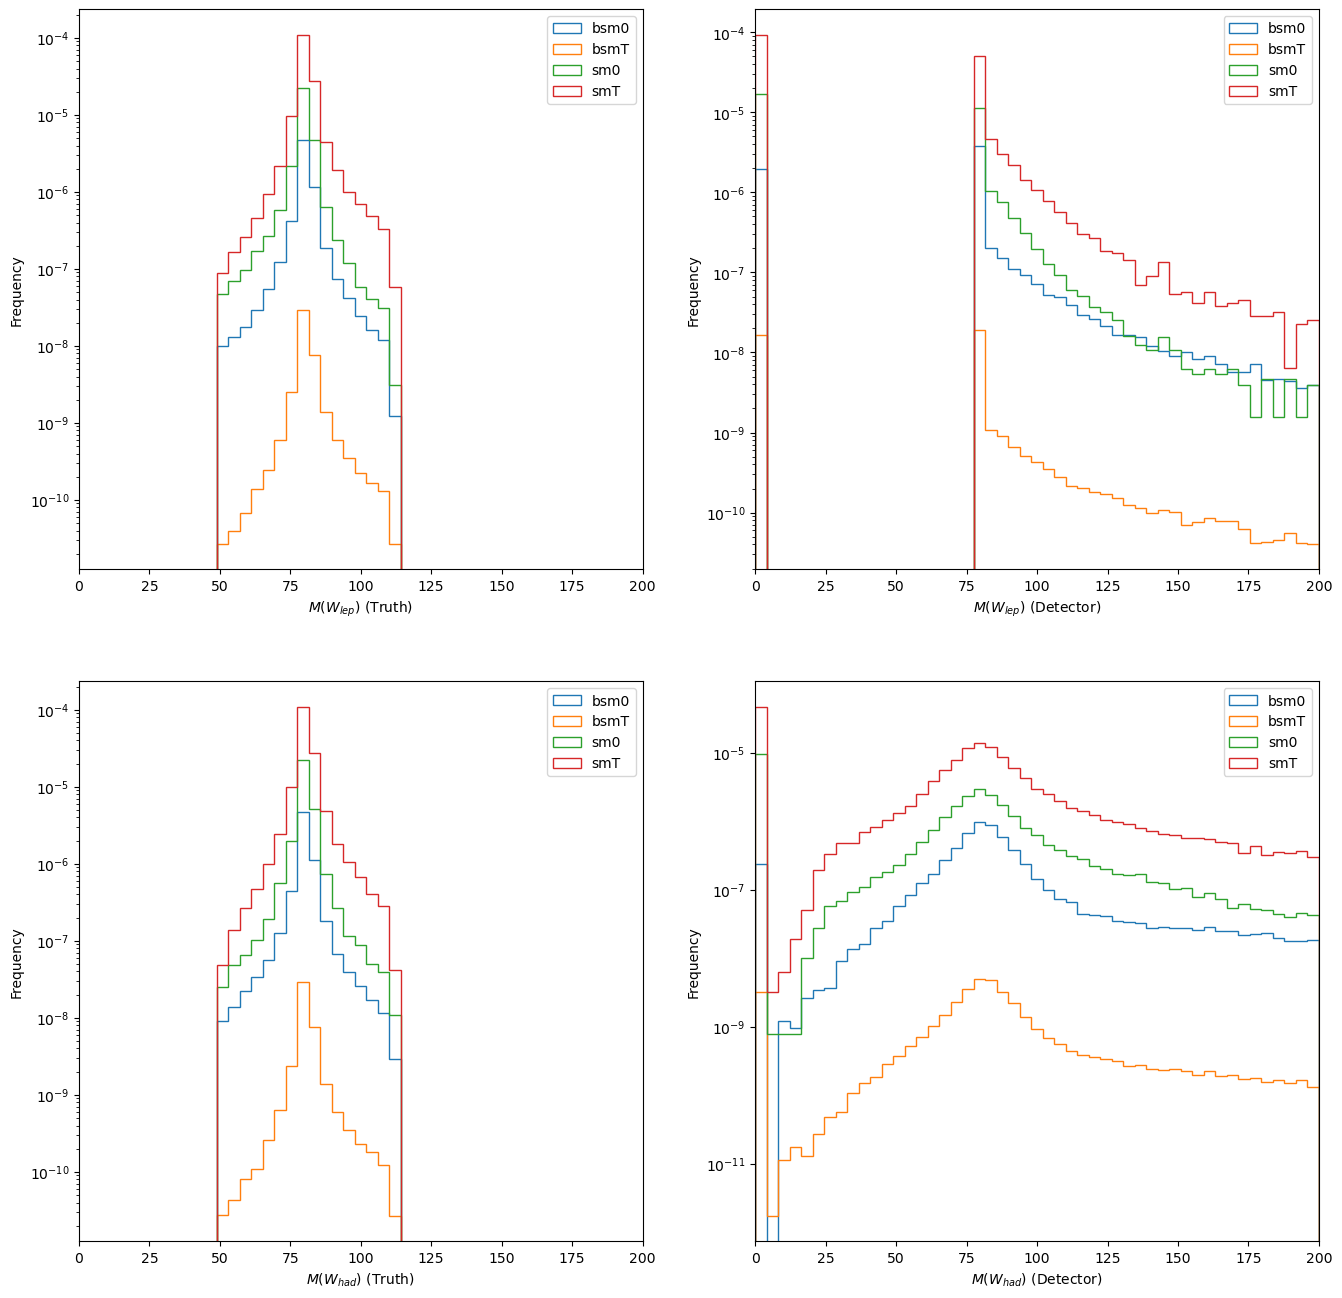

In [9]:
plt.style.use('default') 
plt.figure(figsize=(16, 16),dpi=100)

plt.subplot(2, 2, 1)
plt.xlabel('$M(W_{lep})$ (Truth)')
plt.yscale('log')
X = np.linspace(0.0,200.0,50)
plotdf(df['PROC_bsm_pp-ww0'],'mwlep_truth',X, label='bsm0')
plotdf(df['PROC_bsm_pp-wwT'],'mwlep_truth',X, label='bsmT')
plotdf(df['PROC_sm_pp-ww0'],'mwlep_truth',X, label='sm0')
plotdf(df['PROC_sm_pp-wwT'],'mwlep_truth',X, label='smT')
plt.legend(loc='upper right')
plt.xlim(0.0,200.0)

plt.subplot(2, 2, 2)
plt.xlabel('$M(W_{lep})$ (Detector)')
X = np.linspace(0.0,200.0,50)
plt.yscale('log')
plotdf(df['PROC_bsm_pp-ww0'],'mwlep_det',X, label='bsm0')
plotdf(df['PROC_bsm_pp-wwT'],'mwlep_det',X, label='bsmT')
plotdf(df['PROC_sm_pp-ww0'],'mwlep_det',X, label='sm0')
plotdf(df['PROC_sm_pp-wwT'],'mwlep_det',X, label='smT')
plt.legend(loc='upper right')
plt.xlim(0.0,200.0)

plt.subplot(2, 2, 3)
plt.xlabel('$M(W_{had})$ (Truth)')
plt.yscale('log')
X = np.linspace(0.0,200.0,50)
plotdf(df['PROC_bsm_pp-ww0'],'mwhad_truth',X, label='bsm0')
plotdf(df['PROC_bsm_pp-wwT'],'mwhad_truth',X, label='bsmT')
plotdf(df['PROC_sm_pp-ww0'],'mwhad_truth',X, label='sm0')
plotdf(df['PROC_sm_pp-wwT'],'mwhad_truth',X, label='smT')
plt.legend(loc='upper right')
plt.xlim(0.0,200.0)

plt.subplot(2, 2, 4)
plt.xlabel('$M(W_{had})$ (Detector)')
X = np.linspace(0.0,200.0,50)
plt.yscale('log')
plotdf(df['PROC_bsm_pp-ww0'],'mwhad_det',X, label='bsm0')
plotdf(df['PROC_bsm_pp-wwT'],'mwhad_det',X, label='bsmT')
plotdf(df['PROC_sm_pp-ww0'],'mwhad_det',X, label='sm0')
plotdf(df['PROC_sm_pp-wwT'],'mwhad_det',X, label='smT')
plt.legend(loc='upper right')
plt.xlim(0.0,200.0)